In [1]:
import os
import numpy as np
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
import pandas as pd

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 24,
        }

# get input data
washington_state_loc=os.path.join(os.getcwd(),'_data','WA_State_Boundary')
usahousing_loc=os.path.join(os.getcwd(),'_data','usa_housing.pkl')
#define outputs
washington_state_pic=os.path.join(os.getcwd(),'_output','WA_State_Boundary.png')

df=pd.read_pickle(usahousing_loc)
xs=df['long']
ys=df['lat']
price=(df['price']-df['price'].min())/(df['price'].max()-df['price'].min())
sf = shp.Reader(washington_state_loc)
ax = plt.figure(figsize=(20,14))
for n,shape in enumerate(sf.shapeRecords()):
    rec=sf.record(n)
    dct=rec.as_dict()
    colour='k'
    for i in range(len(shape.shape.parts)):
        i_start = shape.shape.parts[i]
        if i==len(shape.shape.parts)-1:
            i_end = len(shape.shape.points)
        else:
            i_end = shape.shape.parts[i+1]
        x = [i[0] for i in shape.shape.points[i_start:i_end]]
        y = [i[1] for i in shape.shape.points[i_start:i_end]]
        plt.plot(x,y,color='darkblue',linewidth=0.5)
plt.scatter(xs,ys,c=price,s=0.1,cmap=plt.get_cmap('hsv'))
plt.xlabel("longtitude",fontdict=font)
plt.ylabel("latitude",fontdict=font)
plt.title("Washington state map")
plt.tick_params(axis='both', which='major', labelsize=18, color='grey')
plt.grid(color='grey', linestyle=':', linewidth=0.35)
#plt.legend(fontsize=18)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=18)
plt.savefig(washington_state_pic,bbox_inches='tight')
plt.show()

<Figure size 2000x1400 with 1 Axes>

In [2]:
print(df.head())

           id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955    

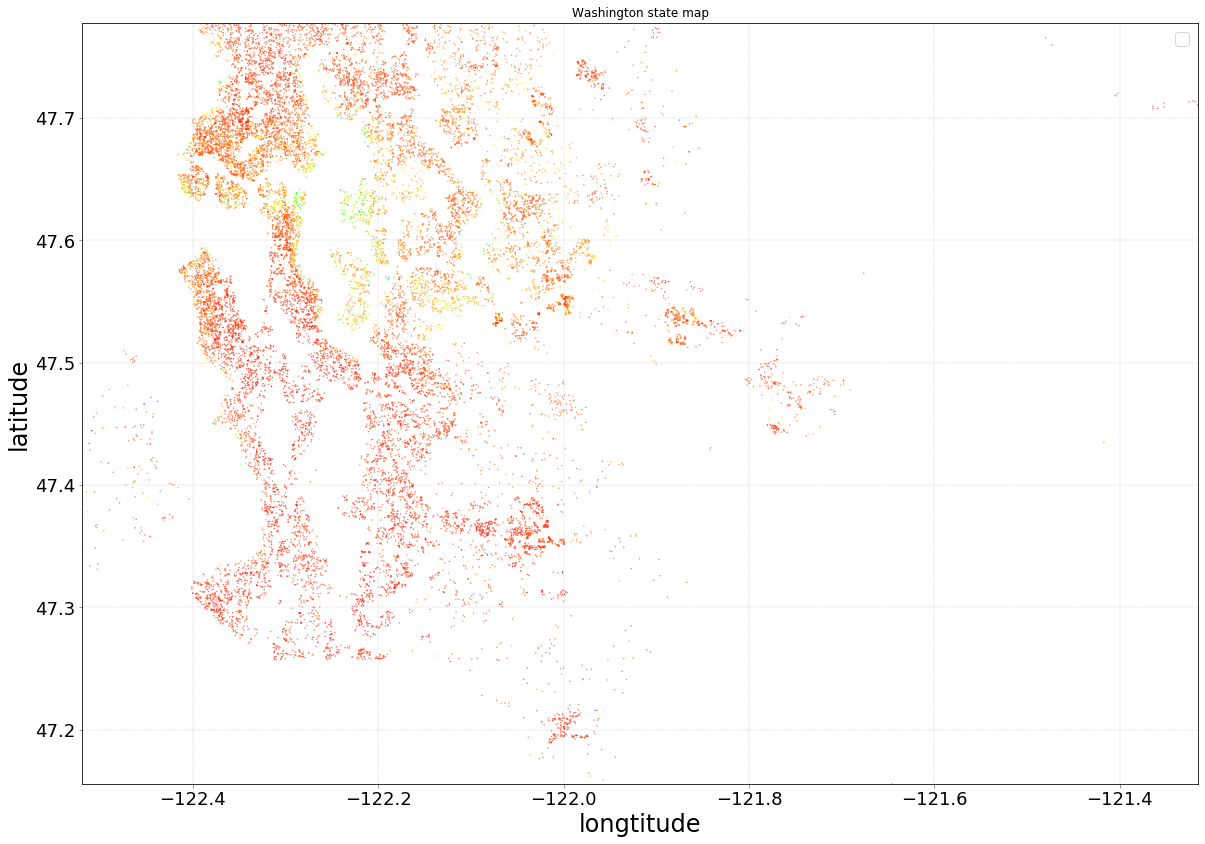

In [3]:
washington_state_pic_2=os.path.join(os.getcwd(),'_output','WA_State_Boundary2.png')

# create map with just lat long data points
x_max=df['long'].max()
x_min=df['long'].min()
y_max=df['lat'].max()
y_min=df['lat'].min()
ax = plt.figure(figsize=(20,14))
for n,shape in enumerate(sf.shapeRecords()):
    rec=sf.record(n)
    dct=rec.as_dict()
    colour='k'
    for i in range(len(shape.shape.parts)):
        i_start = shape.shape.parts[i]
        if i==len(shape.shape.parts)-1:
            i_end = len(shape.shape.points)
        else:
            i_end = shape.shape.parts[i+1]
        x = [i[0] for i in shape.shape.points[i_start:i_end]]
        y = [i[1] for i in shape.shape.points[i_start:i_end]]
        plt.plot(x,y,color='darkblue',linewidth=0.5)
plt.scatter(xs,ys,c=price,s=0.1,cmap=plt.get_cmap('hsv'))
plt.xlabel("longtitude",fontdict=font)
plt.ylabel("latitude",fontdict=font)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.title("Washington state map")
plt.tick_params(axis='both', which='major', labelsize=18, color='grey')
plt.grid(color='grey', linestyle=':', linewidth=0.35)
#plt.legend(fontsize=18)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=18)
plt.savefig(washington_state_pic_2,bbox_inches='tight')
plt.show()

/home/alan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/alan/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


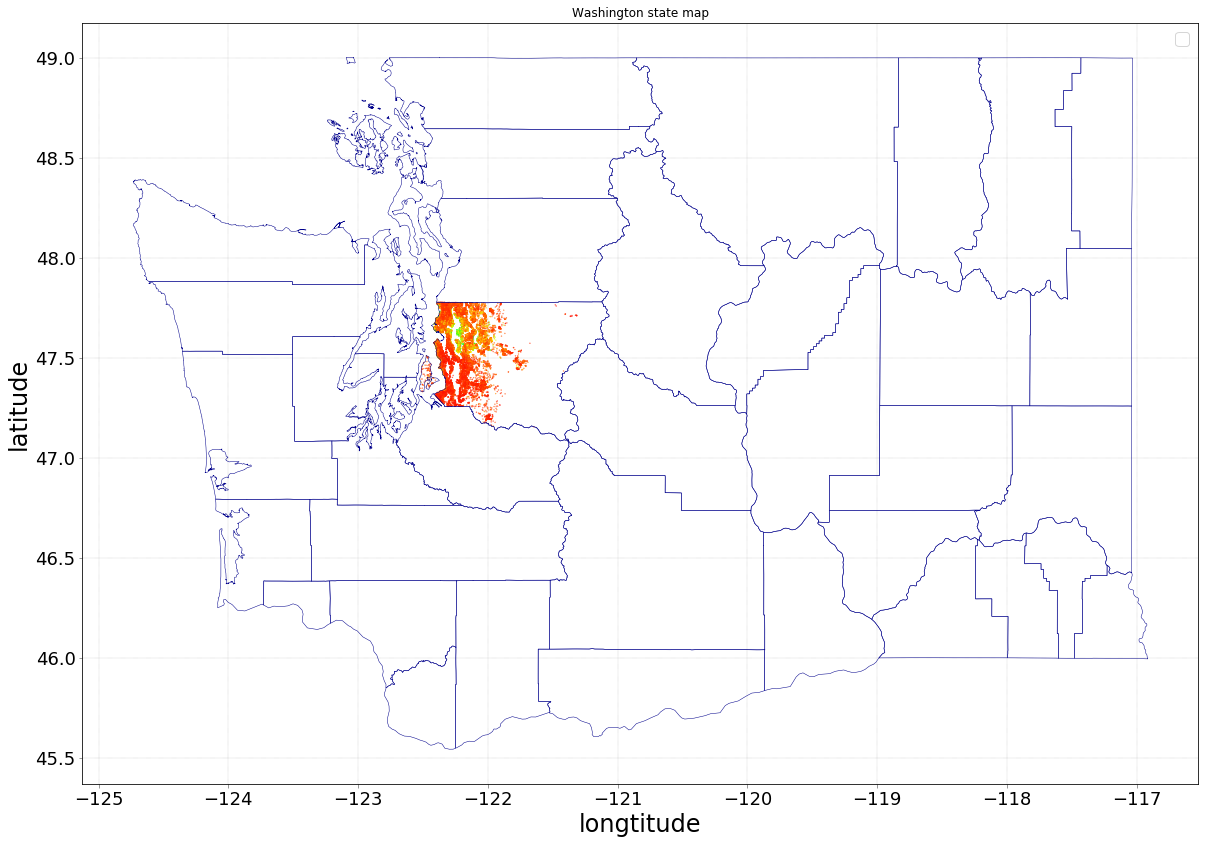

In [4]:
washington_counties_loc=os.path.join(os.getcwd(),'_data','Washington_Counties_with_Natural_Shoreline__washsh_area')
washington_countis_pic=os.path.join(os.getcwd(),'_output','WA_county_Boundarys.png')

sf = shp.Reader(washington_counties_loc)
ax = plt.figure(figsize=(20,14))
for n,shape in enumerate(sf.shapeRecords()):
    rec=sf.record(n)
    dct=rec.as_dict()
    colour='k'
    for i in range(len(shape.shape.parts)):
        i_start = shape.shape.parts[i]
        if i==len(shape.shape.parts)-1:
            i_end = len(shape.shape.points)
        else:
            i_end = shape.shape.parts[i+1]
        x = [i[0] for i in shape.shape.points[i_start:i_end]]
        y = [i[1] for i in shape.shape.points[i_start:i_end]]
        plt.plot(x,y,color='darkblue',linewidth=0.5)
plt.scatter(xs,ys,c=price,s=0.1,cmap=plt.get_cmap('hsv'))
plt.xlabel("longtitude",fontdict=font)
plt.ylabel("latitude",fontdict=font)
plt.title("Washington state map")
plt.tick_params(axis='both', which='major', labelsize=18, color='grey')
plt.grid(color='grey', linestyle=':', linewidth=0.35)
#plt.legend(fontsize=18)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=18)
plt.savefig(washington_countis_pic,bbox_inches='tight')
plt.show()

/home/alan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/alan/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


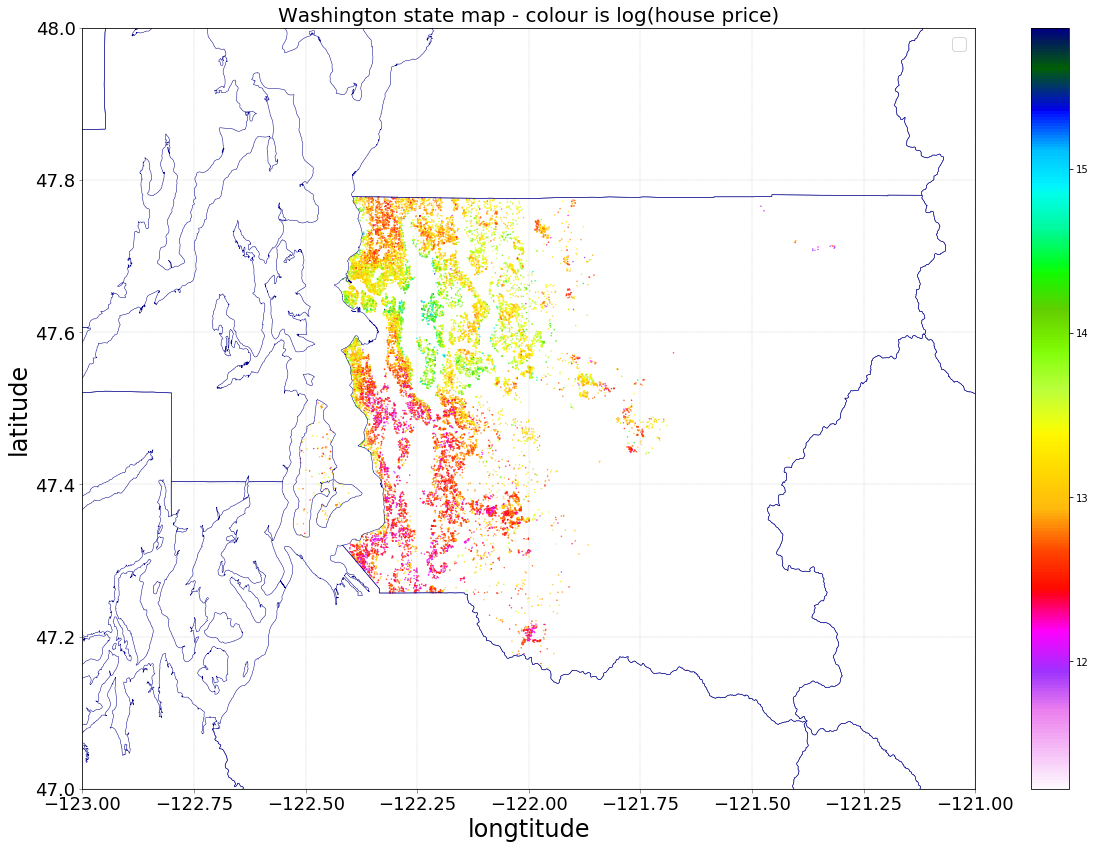

In [5]:
washington_counties_pic_2=os.path.join(os.getcwd(),'_output','WA_county_data2.png')

x_max=-121
x_min=-123.0
y_max=48.0
y_min=47.0
price=np.log(df['price'])
ax = plt.figure(figsize=(20,14))
for n,shape in enumerate(sf.shapeRecords()):
    rec=sf.record(n)
    dct=rec.as_dict()
    colour='k'
    for i in range(len(shape.shape.parts)):
        i_start = shape.shape.parts[i]
        if i==len(shape.shape.parts)-1:
            i_end = len(shape.shape.points)
        else:
            i_end = shape.shape.parts[i+1]
        x = [i[0] for i in shape.shape.points[i_start:i_end]]
        y = [i[1] for i in shape.shape.points[i_start:i_end]]
        plt.plot(x,y,color='darkblue',linewidth=0.5)
cs=plt.scatter(xs,ys,c=price,s=0.2,cmap=plt.get_cmap('gist_ncar_r'))
cbar = ax.colorbar(cs)
plt.xlabel("longtitude",fontdict=font)
plt.ylabel("latitude",fontdict=font)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.title("Washington state map - colour is log(house price)",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18, color='grey')
plt.grid(color='grey', linestyle=':', linewidth=0.35)
#plt.legend(fontsize=18)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=18)
plt.savefig(washington_counties_pic_2,bbox_inches='tight')
plt.show()